In [ ]:
"""
example :http://amunategui.github.io/reinforcement-learning/
explain :http://firsttimeprogrammer.blogspot.tw/2016/09/getting-ai-smarter-with-q-learning.html
explain :http://mnemstudio.org/path-finding-q-learning-tutorial.htm

2018_03_22試著把圖案改成像解釋一樣的圖 

"""

In [15]:
import numpy as np
import pylab as plt
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline
# map cell to cell, add circular cell to goal point
points_list = [(0,4), (4,3), (4,5), (3,2), (3,1), (1,5)]

{0: Text(0.762647,0.64616,'0'),
 1: Text(-0.570059,-0.0292108,'1'),
 2: Text(-0.0201616,-1,'2'),
 3: Text(-0.0700706,-0.357682,'3'),
 4: Text(0.234002,0.280914,'4'),
 5: Text(-0.336357,0.459818,'5')}

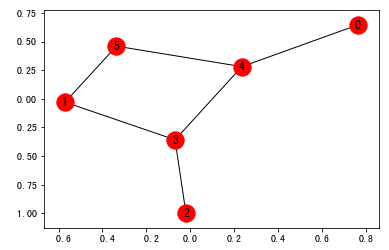

In [16]:
goal = 5

G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G,random_state=1)# random_state=1 可重復性
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)


In [17]:
# how many points in graph? x points
MATRIX_SIZE = 6

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

In [23]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 4)
(4, 3)
(4, 5)
(3, 2)
(3, 1)
(1, 5)


matrix([[  -1.,   -1.,   -1.,   -1.,    0.,   -1.],
        [  -1.,   -1.,   -1.,    0.,   -1.,  100.],
        [  -1.,   -1.,   -1.,    0.,   -1.,   -1.],
        [  -1.,    0.,    0.,   -1.,    0.,   -1.],
        [   0.,   -1.,   -1.,    0.,   -1.,  100.],
        [  -1.,    0.,   -1.,   -1.,    0.,  100.]])

In [5]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

max_value 399.912769413
Score: 1007.10065211
max_value 399.912769413
Score: 1007.10065211
max_value 319.93021553
Score: 1007.10065211
max_value 399.912769413
Score: 1007.10065211
max_value 319.93021553
Score: 1007.10065211
max_value 319.93021553
Score: 1007.10065211
max_value 399.912769413
Score: 1007.10065211
max_value 399.912769413
Score: 1007.10065211
max_value 499.955337939
Score: 1007.09103689
max_value 499.955337939
Score: 1007.09103689
max_value 319.93021553
Score: 1007.09103689
max_value 399.964270351
Score: 1007.101338
max_value 399.912769413
Score: 1007.101338
max_value 319.93021553
Score: 1007.101338
max_value 319.93021553
Score: 1007.101338
max_value 399.912769413
Score: 1007.101338
max_value 399.964270351
Score: 1007.11163911
max_value 319.971416281
Score: 1007.11987999
max_value 399.912769413
Score: 1007.11987999
max_value 319.971416281
Score: 1007.12812088
max_value 255.944172424
Score: 1007.13091251
max_value 399.912769413
Score: 1007.13091251
max_value 319.971416281
Sc

Score: 1007.19836182
max_value 319.996930847
Score: 1007.19851528
max_value 499.995204448
Score: 1007.19875506
max_value 499.995204448
Score: 1007.19899484
max_value 399.996163558
Score: 1007.19899484
max_value 319.996930847
Score: 1007.19899484
max_value 399.996163558
Score: 1007.19899484
max_value 399.996163558
Score: 1007.19899484
max_value 319.996930847
Score: 1007.1991483
max_value 319.996930847
Score: 1007.1991483
max_value 399.996163558
Score: 1007.1991483
max_value 399.996163558
Score: 1007.1991483
max_value 499.996163558
Score: 1007.19740808
max_value 319.996930847
Score: 1007.19740808
max_value 319.996930847
Score: 1007.19775336
max_value 399.996930847
Score: 1007.19790682
max_value 399.996930847
Score: 1007.19790682
max_value 319.996930847
Score: 1007.19790682
max_value 319.996930847
Score: 1007.19790682
max_value 399.996930847
Score: 1007.19806028
max_value 255.997544677
Score: 1007.19818305
max_value 399.996930847
Score: 1007.19833651
max_value 499.996163558
Score: 1007.19

Score: 1007.19997298
max_value 399.999670452
Score: 1007.19997298
max_value 399.999670452
Score: 1007.19997298
max_value 399.999670452
Score: 1007.19997298
max_value 319.999736362
Score: 1007.19997298
max_value 399.999670452
Score: 1007.19997298
max_value 319.999736362
Score: 1007.19997298
max_value 499.999670452
Score: 1007.19982349
max_value 399.999670452
Score: 1007.19982349
max_value 319.999736362
Score: 1007.19982349
max_value 399.999670452
Score: 1007.19983997
max_value 499.999670452
Score: 1007.19983997
max_value 499.999670452
Score: 1007.19985645
max_value 399.999670452
Score: 1007.19985645
max_value 319.999736362
Score: 1007.19985645
max_value 499.999736362
Score: 1007.19975334
max_value 399.999789089
Score: 1007.19977707
max_value 319.999831272
Score: 1007.19979605
max_value 399.999736362
Score: 1007.19980923
max_value 319.999831272
Score: 1007.19980923
max_value 399.999736362
Score: 1007.19980923
max_value 319.999831272
Score: 1007.19980923
max_value 499.999736362
Score: 100

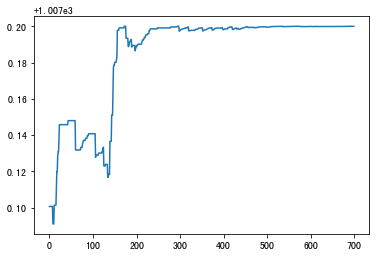

In [7]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 2
steps = [current_state]

while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [19]:
# Version 2.0, with Environmental Details


{'1': Text(-0.0180385,0.560478,'1'),
 '2 - End': Text(-1,0.0426163,'2 - End'),
 '3': Text(-0.358707,0.07386,'3'),
 '4': Text(0.272475,-0.236572,'4'),
 '5 - Outside': Text(0.464778,0.324057,'5 - Outside'),
 'Start': Text(0.639493,-0.764439,'Start')}

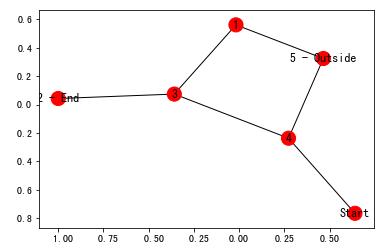

In [9]:
ends = [2]
path = [4,3,1]

G=nx.Graph()
G.add_edges_from(points_list)
mapping={0:'Start', 1:'1', 2:'2 - End', 3:'3', 4:'4', 5:'5 - Outside'} 
H=nx.relabel_nodes(G,mapping) 
pos = nx.spring_layout(H,random_state=1)
nx.draw_networkx_nodes(H,pos, node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H,pos)
nx.draw_networkx_labels(H,pos)


In [13]:
# re-initialize the matrices for new run
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

enviro_ends = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
enviro_path = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))
 
initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act
 
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

def collect_environmental_data(action):
    found = []
    if action in ends:
        found.append('e')

    if action in path:
        found.append('p')
    return (found)
 
available_act = available_actions(initial_state) 
 
action = sample_next_action(available_act)

def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'e' in environment: 
        enviro_ends[current_state, action] += 1

    if 'p' in environment: 
        enviro_path[current_state, action] += 1

    if (np.max(Q) > 0):
        return(np.sum(Q/np.max(Q)*100))
    else:
        return (0)

update(initial_state,action,gamma)

scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)

# print environmental matrices
print('end Found')
print(enviro_ends)
print('path Found')
print(enviro_path)

max_value 100.0
max_value 0.0
max_value 100.0
max_value 180.0
max_value 0.0
max_value 144.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 0.0
max_value 215.2
max_value 215.2
max_value 0.0
max_value 272.16
max_value 0.0
max_value 272.16
max_value 0.0
max_value 0.0
max_value 317.728
max_value 0.0
max_value 0.0
max_value 254.1824
max_value 203.34592
max_value 0.0
max_value 254.1824
max_value 0.0
max_value 317.728
max_value 0.0
max_value 317.728
max_value 254.1824
max_value 254.1824
max_value 162.676736
max_value 254.1824
max_value 317.728
max_value 254.1824
max_value 203.34592
max_value 254.1824
max_value 317.728
max_value 203.34592
max_value 203.34592
max_value 254.1824
max_value 254.1824
max_value 254.1824
max_value 254.1824
max_value 254.1824
max_value 203.34592
max_value 354.1824
max_value 254.1824
max_value 203.34592
max_value 162.676736
max_value 254.1824
max_value 254.1824
max_value 383.34592
max_value 203.34592
max_value 203.34592
ma

max_value 0.0
max_value 0.0
Score: nan
going from: [1 2 4]
to: [2]
max_value 0.0
Score: nan
going from: [3 5]
to: [5]
max_value 100.0
Score: 100.0
going from: [0 3 5]
to: [0 5]
max_value 100.0
Score: 200.0
going from: [1 4 5]
to: [5]
max_value 100.0
Score: 300.0
max_value 0.0
Score: 300.0
going from: [0 3 5]
to: [0 5]
max_value 180.0
Score: 211.111111111
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 211.111111111
going from: [1 4 5]
to: [5]
max_value 180.0
Score: 255.555555556
going from: [3 5]
to: [5]
max_value 244.0
Score: 247.540983607
going from: [1 4 5]
to: [5]
max_value 244.0
Score: 273.770491803
max_value 144.0
Score: 332.786885246
going from: [3 5]
to: [5]
max_value 295.2
Score: 292.411924119
max_value 144.0
Score: 292.411924119
going from: [0 3 5]
to: [0 5]
max_value 115.2
Score: 331.436314363
going from: [0 3 5]
to: [0 5]
max_value 295.2
Score: 370.460704607
going from: [1 4 5]
to: [5]
max_value 295.2
Score: 387.804878049
going from: [3 5]
to: [5]
max_value 336.16
Score: 3

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


Score: 439.850147368
going from: [0 3 5]
to: [0 5]
max_value 490.992800745
Score: 438.291520648
going from: [3 5]
to: [5]
max_value 490.992800745
Score: 438.750142406
going from: [3 5]
to: [5]
max_value 490.992800745
Score: 438.750142406
max_value 0.0
Score: 438.750142406
max_value 0.0
Score: 438.750142406
going from: [1 4 5]
to: [5]
max_value 490.992800745
Score: 439.208764164
max_value 0.0
Score: 439.208764164
max_value 392.794240596
Score: 439.57566157
going from: [1 4 5]
to: [5]
max_value 492.794240596
Score: 438.334321719
going from: [0 3 5]
to: [0 5]
max_value 494.235392477
Score: 437.712255466
going from: [1 4 5]
to: [5]
max_value 494.235392477
Score: 438.003847671
max_value 395.388313982
Score: 438.528713641
going from: [0 3 5]
to: [0 5]
max_value 316.310651185
Score: 443.343917538
max_value 395.388313982
Score: 443.343917538
max_value 395.388313982
Score: 443.343917538
going from: [3 5]
to: [5]
max_value 495.388313982
Score: 443.199405827
going from: [0 3 5]
to: [0 5]
max_valu

going from: [1 4 5]
to: [5]
max_value 499.91692325
Score: 444.0
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 444.0
max_value 0.0
Score: 444.0
going from: [3 5]
to: [5]
max_value 499.9335386
Score: 443.98856712
going from: [0 3 5]
to: [0 5]
max_value 319.94683088
Score: 443.98856712
max_value 0.0
Score: 443.98856712
going from: [0 3 5]
to: [0 5]
max_value 319.94683088
Score: 443.98856712
going from: [3 5]
to: [5]
max_value 499.9335386
Score: 443.98856712
max_value 399.9335386
Score: 443.98856712
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 443.98856712
going from: [1 4 5]
to: [5]
max_value 499.9335386
Score: 443.991890631
going from: [3 5]
to: [5]
max_value 499.94683088
Score: 443.982744786
going from: [3 5]
to: [5]
max_value 499.94683088
Score: 443.982744786
going from: [0 3 5]
to: [0 5]
max_value 499.94683088
Score: 443.988726948
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 443.988726948
max_value 399.957464704
Score: 443.993512678
going from: [0 3 5]
to: [0 5]
max_value 3

going from: [1 4 5]
to: [5]
max_value 499.999978432
Score: 443.999982516
max_value 0.0
Score: 443.999982516
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 443.999982516
max_value 0.0
Score: 443.999982516
going from: [3 5]
to: [5]
max_value 499.999982746
Score: 443.999979549
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 443.999979549
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 443.999979549
max_value 0.0
Score: 443.999979549
going from: [3 5]
to: [5]
max_value 499.999982746
Score: 443.999979549
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 443.999979549
max_value 399.999982746
Score: 443.999989262
going from: [3 5]
to: [5]
max_value 499.999982746
Score: 443.999989262
going from: [0 3 5]
to: [0 5]
max_value 319.999986197
Score: 443.999997032
going from: [3 5]
to: [5]
max_value 499.999982746
Score: 443.999997032
max_value 399.999982746
Score: 443.999997032
max_value 0.0
Score: 443.999997032
going from: [3 5]
to: [5]
max_value 499.999982746
Score: 443.999997032
max_value 399.9

max_value 0.0
Score: 443.999999988
going from: [1 4 5]
to: [5]
max_value 499.999999958
Score: 443.99999999
going from: [3 5]
to: [5]
max_value 499.999999967
Score: 443.999999989
max_value 0.0
Score: 443.999999989
going from: [0 3 5]
to: [0 5]
max_value 319.999999973
Score: 443.999999994
going from: [0 3 5]
to: [0 5]
max_value 499.999999967
Score: 443.999999996
going from: [3 5]
to: [5]
max_value 499.999999967
Score: 443.999999996
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 443.999999996
going from: [1 4 5]
to: [5]
max_value 499.999999967
Score: 443.999999998
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 443.999999998
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 443.999999998
going from: [3 5]
to: [5]
max_value 499.999999973
Score: 443.999999993
going from: [1 2 4]
to: [2]
max_value 0.0
Score: 443.999999993
max_value 399.999999973
Score: 443.999999994
going from: [0 3 5]
to: [0 5]
max_value 499.999999973
Score: 443.999999996
going from: [0 3 5]
to: [0 5]
max_value 319.999999

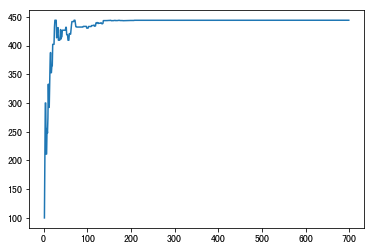

In [14]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# subtract bees with smoke, this gives smoke a negative effect
enviro_matrix = enviro_ends - enviro_path

# Get available actions in the current state
available_act = available_actions(initial_state) 

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print('max_value', R[current_state, action] + gamma * max_value)

    environment = collect_environmental_data(action)
    if 'e' in environment: 
        enviro_matrix[current_state, action] += 1
    if 'p' in environment: 
        enviro_matrix[current_state, action] -= 1

    return(np.sum(Q/np.max(Q)*100))

update(initial_state,action,gamma)

enviro_matrix_snap = enviro_matrix.copy()

def available_actions_with_enviro_help(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = enviro_matrix_snap[state,av_act]
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_act = av_act[np.array(env_pos_row)[0]>=0]
        if len(temp_av_act) > 0:
            print('going from:',av_act)
            print('to:',temp_av_act)
            av_act = temp_av_act
    return av_act

# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions_with_enviro_help(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))

plt.plot(scores)
